In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('Datasets/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(df.iloc[:,0:3],axis=1,inplace=True)

In [7]:
cat_cols=df.select_dtypes(include='object').columns

In [8]:
x=df.drop('Exited',axis=1)
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


transformer=ColumnTransformer(transformers=[
    ('onehot',OneHotEncoder(sparse_output=False,drop='first'),cat_cols)
],remainder='passthrough')

x_train_transformed=transformer.fit_transform(x_train)
x_test_transformed=transformer.transform(x_test)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_transformed)
x_test_scaled=scaler.transform(x_test_transformed)

In [10]:
x_train_scaled.shape

(8000, 11)

In [11]:
model=Sequential(
    [
        Dense(64,activation='relu',input_dim=11),
        BatchNormalization(),
        # Activation('relu'),
        # Dropout(0.2),
        Dense(32,activation='relu'),
        BatchNormalization(),
        # Activation('relu'),
        # BatchNormalization(),
        Dropout(0.2),
        Dense(1,activation='sigmoid')
    ]
)

callback=EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='auto')

/Users/hades/jupyter_env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 192 (768.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
x_train_scaled.shape

(8000, 11)

In [15]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2,batch_size=8,callbacks=[callback])

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.7514 - loss: 0.5292 - val_accuracy: 0.8425 - val_loss: 0.3854
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8156 - loss: 0.4311 - val_accuracy: 0.8494 - val_loss: 0.3670
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8202 - loss: 0.4173 - val_accuracy: 0.8500 - val_loss: 0.3582
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8294 - loss: 0.4030 - val_accuracy: 0.8487 - val_loss: 0.3524
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8380 - loss: 0.3903 - val_accuracy: 0.8500 - val_loss: 0.3559
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8406 - loss: 0.3912 - val_accuracy: 0.8556 - val_loss: 0.3484
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8455 - loss: 0.3807 - val_accuracy: 0.8537 - val_loss: 0.3498
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8439 - loss: 0

/var/folders/h4/hyzcmkfj6znf3h1xgg6qs93r0000gn/T/ipykernel_1175/4024139040.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


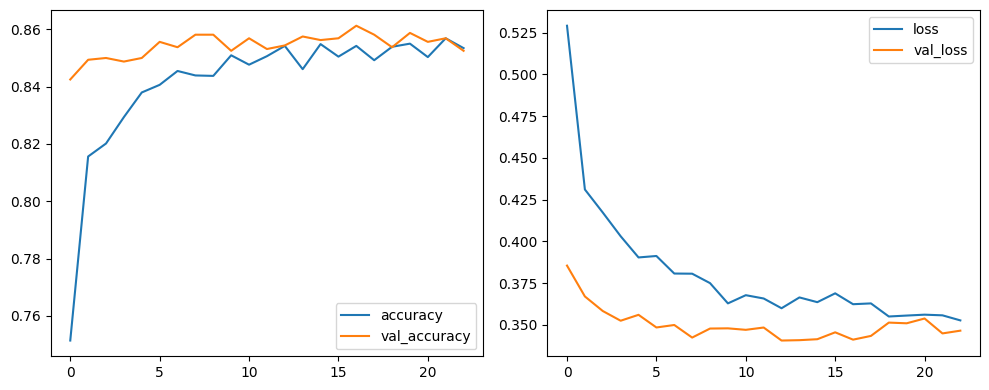

In [16]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes[0].plot(history.history['accuracy'],label='accuracy')
axes[0].plot(history.history['val_accuracy'],label='val_accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'],label='loss')
axes[1].plot(history.history['val_loss'],label='val_loss')
axes[1].legend()


fig.tight_layout()
fig.show()


In [17]:
y_pred=model.predict(x_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step


array([[0.03228067],
       [0.01380336],
       [0.10618236],
       ...,
       [0.7812464 ],
       [0.24639232],
       [0.24032304]], dtype=float32)

In [18]:
# y_pred=y_pred.argmax(axis=-1)
# y_pred
y_pred=(y_pred>0.5).astype('int')

In [19]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

0.859


In [20]:
model.evaluate(x_test_scaled,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8590 - loss: 0.3506


[0.3506382405757904, 0.859000027179718]